Epoch 1/200


C:\Users\subbu\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 352ms/step - accuracy: 0.7465 - loss: 4.0858 - val_accuracy: 0.7467 - val_loss: 4.0822
Epoch 2/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 212ms/step - accuracy: 0.7494 - loss: 4.0384 - val_accuracy: 0.7467 - val_loss: 4.0822
Epoch 3/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 236ms/step - accuracy: 0.7467 - loss: 4.0832 - val_accuracy: 0.7467 - val_loss: 4.0822
Epoch 4/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 230ms/step - accuracy: 0.7477 - loss: 4.0666 - val_accuracy: 0.7467 - val_loss: 4.0822
Epoch 5/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 238ms/step - accuracy: 0.7471 - loss: 4.0767 - val_accuracy: 0.7467 - val_loss: 4.0822
Epoch 6/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 256ms/step - accuracy: 0.7470 - loss: 4.0777 - val_accuracy: 0.7467 - val_loss: 4.0822
Epoch 7/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 256ms/step - accuracy: 0.7463 - loss: 4.0893 - val_accuracy: 0.7467 - val_loss: 4.0822
Epoch 8/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 210ms/step - accuracy: 0.7472 - loss: 4.0747 - val_accuracy: 0.7467 - val_loss: 4.0

C:\Users\subbu\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\subbu\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\subbu\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

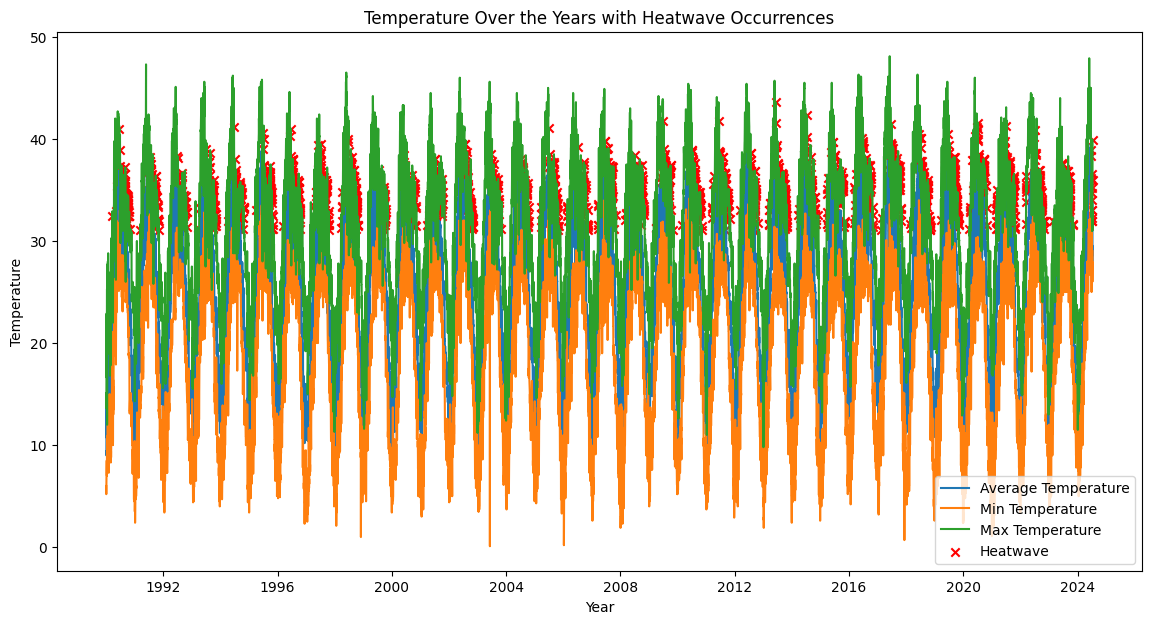

Prediction for : Invalid date format. Please use YYYY-MM-DD.
Prediction for : Invalid date format. Please use YYYY-MM-DD.
Prediction for : Invalid date format. Please use YYYY-MM-DD.
Prediction for : Invalid date format. Please use YYYY-MM-DD.
Prediction for : Invalid date format. Please use YYYY-MM-DD.
Prediction for : Invalid date format. Please use YYYY-MM-DD.
Prediction for : Invalid date format. Please use YYYY-MM-DD.
Prediction for : Invalid date format. Please use YYYY-MM-DD.
Prediction for : Invalid date format. Please use YYYY-MM-DD.
Prediction for : Invalid date format. Please use YYYY-MM-DD.
Prediction for : Invalid date format. Please use YYYY-MM-DD.
Prediction for : Invalid date format. Please use YYYY-MM-DD.
Prediction for : Invalid date format. Please use YYYY-MM-DD.
Prediction for : Invalid date format. Please use YYYY-MM-DD.
Prediction for : Invalid date format. Please use YYYY-MM-DD.
Prediction for : Invalid date format. Please use YYYY-MM-DD.
Prediction for : Invalid

KeyboardInterrupt: Interrupted by user

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
from datetime import datetime

# Load and preprocess data (assuming 'hu.csv' contains the dataset)
df = pd.read_csv('hu.csv')  

# Convert 'time' column to datetime with the correct format
df['time'] = pd.to_datetime(df['time'], format='%d-%m-%Y')

# Sort data by time
df = df.sort_values(by='time')

# Define labels for heatwave classification based on threshold temperature and humidity
threshold_temp = 31  # Example threshold for temperature to classify as heatwave
threshold_humid = 60  # Example threshold for humidity to classify as heatwave

# Define function to classify heatwave based on temperature and humidity
def classify_heatwave(row):
    if row['tmax'] > threshold_temp and row['humid'] == 100:
        return 1  # Heatwave due to high temperature and 100% humidity
    elif row['tmax'] > threshold_temp and row['humid'] > threshold_humid:
        return 1  # Heatwave due to high temperature and high humidity
    else:
        return 0  # Not a heatwave

# Apply classification function to create 'Heatwave' column
df['Heatwave'] = df.apply(classify_heatwave, axis=1)

# Prepare data for LSTM model
features = ['tavg', 'tmin', 'tmax', 'prcp', 'humid']  # Include 'humid' in features
X = df[features].values
y = df['Heatwave'].values

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Reshape input data for LSTM (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Define and compile the LSTM model
model = Sequential()
model.add(LSTM(500, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1, activation='relu'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=200, batch_size=4000, validation_data=(X_test, y_test))

# Evaluate the model
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')

# Classification report
print(classification_report(y_test, y_pred))

# Function to predict heatwave for a given date based on historical data
def predict_heatwave(date_str):
    try:
        date = datetime.strptime(date_str, '%Y-%m-%d')
    except ValueError:
        return "Invalid date format. Please use YYYY-MM-DD."
    
    # Using the average of historical data as a placeholder for prediction
    avg_tavg = df['tavg'].mean()
    avg_tmin = df['tmin'].mean()
    avg_tmax = df['tmax'].mean()
    avg_prcp = df['prcp'].mean()
    avg_humid = df['humid'].mean()  # Include average humidity
    
    sample = np.array([[avg_tavg, avg_tmin, avg_tmax, avg_prcp, avg_humid]])
    sample_scaled = scaler.transform(sample)
    sample_scaled = sample_scaled.reshape((1, 1, sample_scaled.shape[1]))
    prediction_prob = model.predict(sample_scaled)
    prediction = (prediction_prob > 0.5).astype(int)
    return "Heatwave" if prediction == 1 else "No Heatwave"

# Plot temperature over the years with heatwave occurrences marked
plt.figure(figsize=(14, 7))
plt.plot(df['time'], df['tavg'], label='Average Temperature')
plt.plot(df['time'], df['tmin'], label='Min Temperature')
plt.plot(df['time'], df['tmax'], label='Max Temperature')

# Mark heatwave occurrences with a cross
heatwave_dates = df[df['Heatwave'] == 1]['time']
heatwave_temps = df[df['Heatwave'] == 1]['tmax']
plt.scatter(heatwave_dates, heatwave_temps, color='red', marker='x', label='Heatwave')

plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Temperature Over the Years with Heatwave Occurrences')
plt.legend()
plt.show()

# Interactive user input
while True:
    date_str = input("Enter a date (YYYY-MM-DD) to predict heatwave or 'exit' to quit: ")
    if date_str.lower() == 'exit':
        break
    prediction = predict_heatwave(date_str)
    print(f'Prediction for {date_str}: {prediction}')



In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
from datetime import datetime

# Load and preprocess data
df = pd.read_csv('12delhi_cu.csv')  

# Convert 'time' column to datetime with the correct format
df['time'] = pd.to_datetime(df['time'], format='%d-%m-%Y')

# Sort data by time
df = df.sort_values(by='time')

# Define thresholds for heatwave classification
threshold_temp = 31  # Temperature threshold for heatwave
threshold_humid = 60  # Humidity threshold for heatwave

# Define function to classify heatwave based on temperature and humidity
def classify_heatwave(row):
    if row['tmax'] > 38 and row['humid'] == 100:
        return 1  # Heatwave due to high temperature and 100% humidity
    elif row['tmax'] > threshold_temp and row['humid'] > threshold_humid:
        return 1  # Heatwave due to high temperature and high humidity
    else:
        return 0  # Not a heatwave

# Apply classification function to create 'Heatwave' column
df['Heatwave'] = df.apply(classify_heatwave, axis=1)

# Prepare data
features = ['tavg', 'tmin', 'tmax', 'prcp', 'humid']  # Include 'humid' in features
X = df[features].values
y = df['Heatwave'].values

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Reshape input data for LSTM (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Define and compile the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=500, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')

# Classification report
print(classification_report(y_test, y_pred))

# Function to predict heatwave for a given date based on historical data
def predict_heatwave(date_str):
    try:
        date = datetime.strptime(date_str, '%Y-%m-%d')
    except ValueError:
        return "Invalid date format. Please use YYYY-MM-DD."
    
    # Using the average of historical data as a placeholder for prediction
    avg_tavg = df['tavg'].mean()
    avg_tmin = df['tmin'].mean()
    avg_tmax = df['tmax'].mean()
    avg_prcp = df['prcp'].mean()
    avg_humid = df['humid'].mean()
    
    sample = np.array([[avg_tavg, avg_tmin, avg_tmax, avg_prcp, avg_humid]])
    sample_scaled = scaler.transform(sample)
    sample_scaled = sample_scaled.reshape((1, 1, sample_scaled.shape[1]))
    prediction_prob = model.predict(sample_scaled)
    prediction = (prediction_prob > 0.5).astype(int)
    return "Heatwave" if prediction == 1 else "No Heatwave"

# Plot temperature over the years with heatwave occurrences marked
plt.figure(figsize=(14, 7))
plt.plot(df['time'], df['tavg'], label='Average Temperature')
plt.plot(df['time'], df['tmin'], label='Min Temperature')
plt.plot(df['time'], df['tmax'], label='Max Temperature')

# Mark heatwave occurrences with a cross
heatwave_dates = df[df['Heatwave'] == 1]['time']
heatwave_temps = df[df['Heatwave'] == 1]['tmax']
plt.scatter(heatwave_dates, heatwave_temps, color='red', marker='x', label='Heatwave')

plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Temperature Over the Years with Heatwave Occurrences')
plt.legend()
plt.show()

# Interactive user input
while True:
    date_str = input("Enter a date (YYYY-MM-DD) to predict heatwave or 'exit' to quit: ")
    if date_str.lower() == 'exit':
        break
    prediction = predict_heatwave(date_str)
    print(f'Prediction for {date_str}: {prediction}')


KeyError: 'humid'

In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
from datetime import datetime

# Load and preprocess data
df = pd.read_csv('hu.csv')  

# Convert 'time' column to datetime with the correct format
df['time'] = pd.to_datetime(df['time'], format='%d-%m-%Y')

# Sort data by time
df = df.sort_values(by='time')

# Define thresholds for heatwave classification
threshold_temp = 38  # Threshold for high temperature for a heatwave
threshold_humid = 60  # Threshold for high humidity for a heatwave

# Define function to classify heatwave based on temperature and humidity
def classify_heatwave(row):
    if row['tmax'] > threshold_temp and row['humid'] == 100:
        return 1  # Heatwave due to high temperature and 100% humidity
    elif row['tmax'] > threshold_temp and row['humid'] > threshold_humid:
        return 1  # Heatwave due to high temperature and high humidity
    else:
        return 0  # Not a heatwave

# Apply classification function to create 'Heatwave' column
df['Heatwave'] = df.apply(classify_heatwave, axis=1)

# Feature engineering (if needed)
# Example: Creating temperature anomaly feature
df['temperature_anomaly'] = df['tavg'] - df['tavg'].mean()

# Prepare data for LSTM model
features = ['tavg', 'tmin', 'tmax', 'humid']  # Include 'humid' in features
X = df[features].values
y = df['Heatwave'].values

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Reshape input data for LSTM (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Define and compile the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1, activation='relu'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=400, validation_data=(X_test, y_test))

# Evaluate the model
y_pred_prob = model.predict(X_test,y_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')

# Classification report
print(classification_report(y_test, y_pred))

# Function to predict heatwave for a given date based on historical data
def predict_heatwave(date_str):
    try:
        date = datetime.strptime(date_str, '%Y-%m-%d')
    except ValueError:
        return "Invalid date format. Please use YYYY-MM-DD."
    
    # Using the average of historical data as a placeholder for prediction
    avg_tavg = df['tavg'].mean()
    #avg_tmin = df['tmin'].mean()
    #avg_tmax = df['tmax'].mean()
    avg_prcp = df['prcp'].mean()
    avg_humid = df['humid'].mean()
    
    sample = np.array([[avg_tavg, avg_humid]])
    sample_scaled = scaler.transform(sample)
    sample_scaled = sample_scaled.reshape((1, 1, sample_scaled.shape[1]))
    prediction_prob = model.predict(sample_scaled)
    prediction = (prediction_prob > 0.5).astype(int)
    return "Heatwave" if prediction == 1 else "No Heatwave"

# Plot temperature over the years with heatwave occurrences marked
plt.figure(figsize=(14, 7))
plt.plot(df['time'], df['tavg'], label='Average Temperature')
plt.plot(df['time'], df['tmin'], label='Min Temperature')
plt.plot(df['time'], df['tmax'], label='Max Temperature')

# Mark heatwave occurrences with a cross
heatwave_dates = df[df['Heatwave'] == 1]['time']
heatwave_temps = df[df['Heatwave'] == 1]['tmax']
plt.scatter(heatwave_dates, heatwave_temps, color='red', marker='x', label='Heatwave')

plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Temperature Over the Years with Heatwave Occurrences')
plt.legend()
plt.show()

# Interactive user input for heatwave prediction
while True:
    date_str = input("Enter a date (YYYY-MM-DD) to predict heatwave or 'exit' to quit: ")
    if date_str.lower() == 'exit':
        break
    prediction = predict_heatwave(date_str)
    print(f'Prediction for {date_str}: {prediction}')


Epoch 1/100


C:\Users\subbu\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.7177 - loss: nan - val_accuracy: 0.9889 - val_loss: nan
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9879 - loss: nan - val_accuracy: 0.9889 - val_loss: nan
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9910 - loss: nan - val_accuracy: 0.9889 - val_loss: nan
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9901 - loss: nan - val_accuracy: 0.9889 - val_loss: nan
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9873 - loss: nan - val_accuracy: 0.9889 - val_loss: nan
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9888 - loss: nan - val_accuracy: 0.9889 - val_loss: nan
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9879 - loss: nan - val_accuracy: 0.9889 - val_loss: nan
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9880 - loss: nan - val_accuracy: 0.9889 - val_loss: nan
Epoch 9/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

Epoch 1/100


C:\Users\subbu\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


316/316 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9454 - loss: nan - val_accuracy: 0.9889 - val_loss: nan
Epoch 2/100
316/316 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9886 - loss: nan - val_accuracy: 0.9889 - val_loss: nan
Epoch 3/100
316/316 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9889 - loss: nan - val_accuracy: 0.9889 - val_loss: nan
Epoch 4/100
316/316 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9878 - loss: nan - val_accuracy: 0.9889 - val_loss: nan
Epoch 5/100
316/316 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9874 - loss: nan - val_accuracy: 0.9889 - val_loss: nan
Epoch 6/100
316/316 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9873 - loss: nan - val_accuracy: 0.9889 - val_loss: nan
Epoch 7/100
316/316 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9884 - loss: nan - val_accuracy: 0.9889 - val_loss: nan
Epoch 8/100
316/316 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9893 - loss: nan - val_accuracy: 0.9889 - val_loss: nan
Epoch 9/100
316/316 ━━━━━━━━

C:\Users\subbu\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\subbu\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\subbu\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

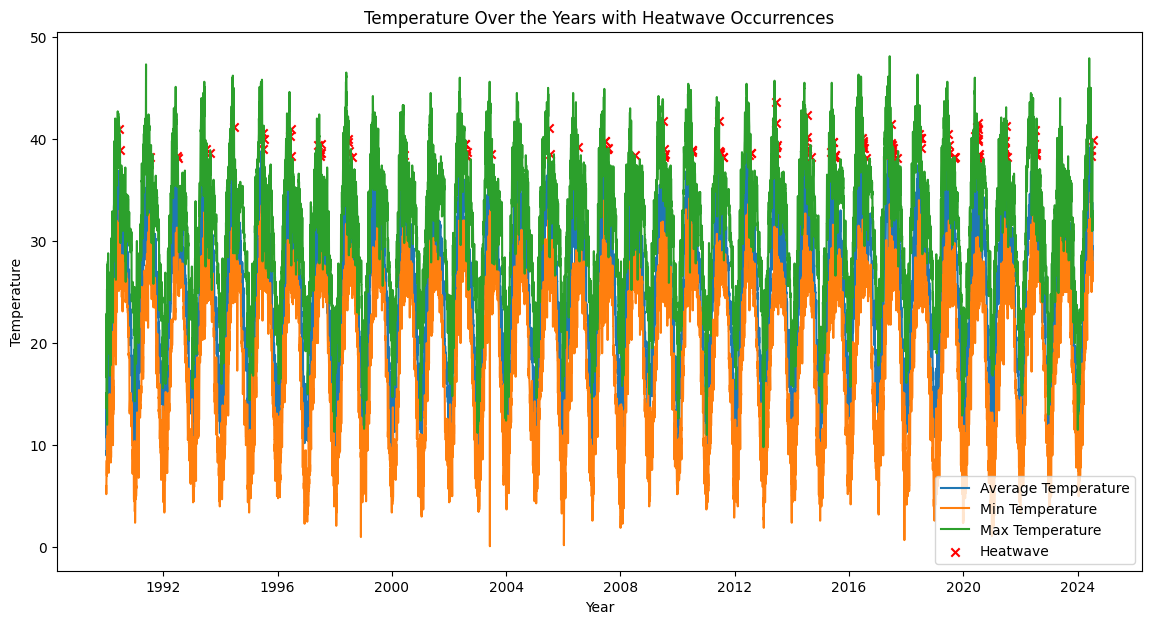

In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
from datetime import datetime

# Load and preprocess data
df = pd.read_csv('hu.csv')

# Convert 'time' column to datetime with the correct format
df['time'] = pd.to_datetime(df['time'], format='%d-%m-%Y')

# Sort data by time
df = df.sort_values(by='time')

# Define thresholds for heatwave classification
threshold_temp = 38  # Threshold for high temperature for a heatwave
threshold_humid = 60  # Threshold for high humidity for a heatwave

# Define function to classify heatwave based on temperature and humidity
def classify_heatwave(row):
    if row['tmax'] > threshold_temp and row['humid'] == 100:
        return 1  # Heatwave due to high temperature and 100% humidity
    elif row['tmax'] > threshold_temp and row['humid'] > threshold_humid:
        return 1  # Heatwave due to high temperature and high humidity
    else:
        return 0  # Not a heatwave

# Apply classification function to create 'Heatwave' column
df['Heatwave'] = df.apply(classify_heatwave, axis=1)

# Prepare data for LSTM model
features = ['tavg', 'tmin', 'tmax', 'humid']  # Include 'humid' in features
X = df[features].values
y = df['Heatwave'].values

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Reshape input data for LSTM (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Define and compile the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1, activation='relu'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')

# Classification report
print(classification_report(y_test, y_pred))

# Function to predict heatwave for a given date based on historical data
def predict_heatwave(date_str):
    try:
        date = datetime.strptime(date_str, '%Y-%m-%d')
    except ValueError:
        return "Invalid date format. Please use YYYY-MM-DD."
    
    # Using the average of historical data as a placeholder for prediction
    avg_tavg = df['tavg'].mean()
    avg_humid = df['humid'].mean()
    
    sample = np.array([[avg_tavg, avg_humid]])
    sample_scaled = scaler.transform(sample)
    sample_scaled = sample_scaled.reshape((1, 1, sample_scaled.shape[1]))
    prediction_prob = model.predict(sample_scaled)
    prediction = (prediction_prob > 0.5).astype(int)
    return "Heatwave" if prediction == 1 else "No Heatwave"

# Plot temperature over the years with heatwave occurrences marked
plt.figure(figsize=(14, 7))
plt.plot(df['time'], df['tavg'], label='Average Temperature')
plt.plot(df['time'], df['tmin'], label='Min Temperature')
plt.plot(df['time'], df['tmax'], label='Max Temperature')

# Mark heatwave occurrences with a cross
heatwave_dates = df[df['Heatwave'] == 1]['time']
heatwave_temps = df[df['Heatwave'] == 1]['tmax']
plt.scatter(heatwave_dates, heatwave_temps, color='red', marker='x', label='Heatwave')

plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Temperature Over the Years with Heatwave Occurrences')
plt.legend()
plt.show()

# Interactive user input for heatwave prediction
while True:
    date_str = input("Enter a date (YYYY-MM-DD) to predict heatwave or 'exit' to quit: ")
    if date_str.lower() == 'exit':
        break
    prediction = predict_heatwave(date_str)
    print(f'Prediction for {date_str}: {prediction}')


Epoch 1/100


C:\Users\subbu\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 332ms/step - accuracy: 0.9913 - loss: 0.1405 - val_accuracy: 0.9929 - val_loss: 0.1150
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9913 - loss: 0.1410 - val_accuracy: 0.9929 - val_loss: 0.1150
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9913 - loss: 0.1405 - val_accuracy: 0.9929 - val_loss: 0.1150
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9913 - loss: 0.1405 - val_accuracy: 0.9929 - val_loss: 0.1150
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9914 - loss: 0.1394 - val_accuracy: 0.9929 - val_loss: 0.1150
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9913 - loss: 0.1399 - val_accuracy: 0.9929 - val_loss: 0.1150
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9913 - loss: 0.1399 - val_accuracy: 0.9929 - val_loss: 0.1150
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9913 - loss: 0.1399 - val_accuracy: 0.9929 - val_loss: 0.1150
Epo

C:\Users\subbu\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\subbu\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\subbu\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

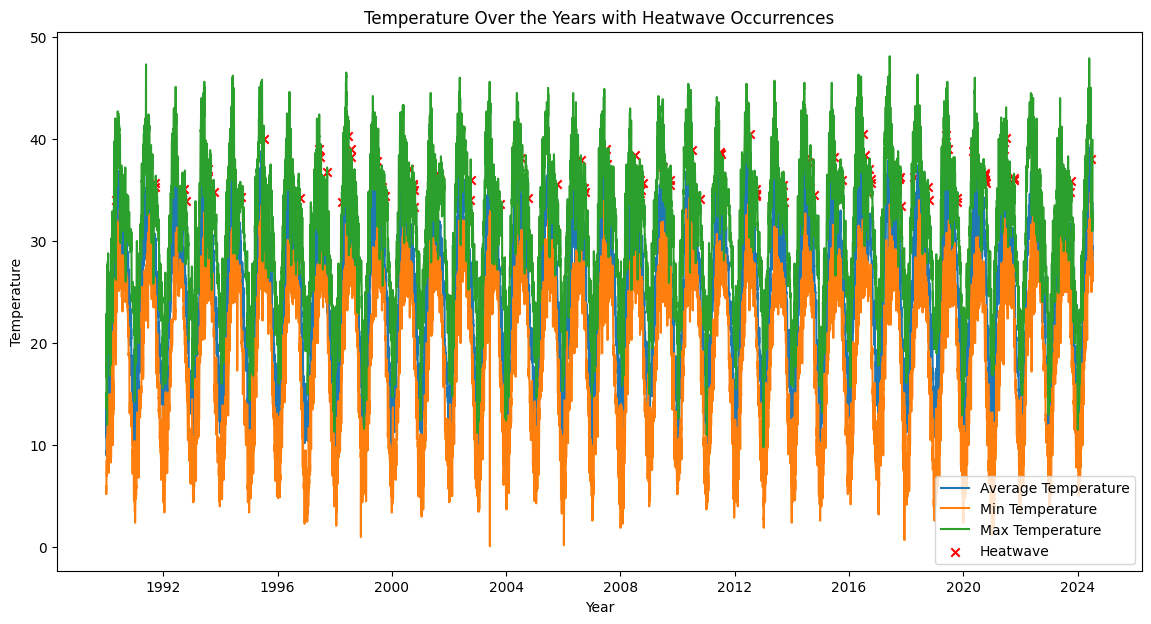

In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
from datetime import datetime

# Load and preprocess data
df = pd.read_csv('hu.csv')

# Convert 'time' column to datetime with the correct format
df['time'] = pd.to_datetime(df['time'], format='%d-%m-%Y')

# Sort data by time
df = df.sort_values(by='time')

# Define thresholds for heatwave classification
threshold_temp = 33  # Threshold for high temperature for a heatwave
threshold_humid = 60  # Threshold for high humidity for a heatwave

# Define function to classify heatwave based on temperature and humidity
def classify_heatwave(row):
    if row['tmax'] >= threshold_temp and row['humid'] == 60:
        return 1  # Heatwave due to high temperature and 100% humidity
    elif row['tmax'] > threshold_temp and row['humid'] > 100:
        return 1  # Heatwave due to high temperature and high humidity
    else:
        return 0  # Not a heatwave

# Apply classification function to create 'Heatwave' column
df['Heatwave'] = df.apply(classify_heatwave, axis=1)

# Prepare data for LSTM model
features = ['tavg', 'tmin', 'tmax', 'humid']  # Include 'humid' in features
X = df[features].values
y = df['Heatwave'].values

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Reshape input data for LSTM (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Define and compile the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1, activation='relu'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=10000, validation_data=(X_test, y_test))

# Evaluate the model
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')

# Classification report
print(classification_report(y_test, y_pred))

# Function to predict heatwave for a given date based on historical data
def predict_heatwave(date_str):
    try:
        date = datetime.strptime(date_str, '%Y-%m-%d')
    except ValueError:
        return "Invalid date format. Please use YYYY-MM-DD."
    
    # Using the average of historical data as a placeholder for prediction
    avg_tavg = df['tavg'].mean()
    avg_humid = df['humid'].mean()
    
    sample = np.array([[avg_tavg, avg_humid]])
    sample_scaled = scaler.transform(sample)
    sample_scaled = sample_scaled.reshape((1, 1, sample_scaled.shape[1]))
    prediction_prob = model.predict(sample_scaled)
    prediction = (prediction_prob > 0.5).astype(int)
    return "Heatwave" if prediction == 1 else "No Heatwave"

# Plot temperature over the years with heatwave occurrences marked
plt.figure(figsize=(14, 7))
plt.plot(df['time'], df['tavg'], label='Average Temperature')
plt.plot(df['time'], df['tmin'], label='Min Temperature')
plt.plot(df['time'], df['tmax'], label='Max Temperature')

# Mark heatwave occurrences with a cross
heatwave_dates = df[df['Heatwave'] == 1]['time']
heatwave_temps = df[df['Heatwave'] == 1]['tmax']
plt.scatter(heatwave_dates, heatwave_temps, color='red', marker='x', label='Heatwave')

plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Temperature Over the Years with Heatwave Occurrences')
plt.legend()
plt.show()

# Interactive user input for heatwave prediction
while True:
    date_str = input("Enter a date (YYYY-MM-DD) to predict heatwave or 'exit' to quit: ")
    if date_str.lower() == 'exit':
        break
    prediction = predict_heatwave(date_str)
    print(f'Prediction for {date_str}: {prediction}')


In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_recall_curve, auc
from sklearn.utils import class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
from datetime import datetime
from imblearn.over_sampling import SMOTE

# Load and preprocess data
df = pd.read_csv('hu.csv')

# Convert 'time' column to datetime with the correct format
df['time'] = pd.to_datetime(df['time'], format='%d-%m-%Y')

# Sort data by time
df = df.sort_values(by='time')

# Define thresholds for heatwave classification
threshold_temp = 33  # Threshold for high temperature for a heatwave
threshold_humid = 60  # Threshold for high humidity for a heatwave

# Define function to classify heatwave based on temperature and humidity
def classify_heatwave(row):
    if row['tmax'] >= threshold_temp and row['humid'] == 60:
        return 1  # Heatwave due to high temperature and 100% humidity
    elif row['tmax'] > threshold_temp and row['humid'] > 100:
        return 1  # Heatwave due to high temperature and high humidity
    else:
        return 0  # Not a heatwave

# Apply classification function to create 'Heatwave' column
df['Heatwave'] = df.apply(classify_heatwave, axis=1)

# Prepare data for LSTM model
features = ['tavg', 'tmin', 'tmax', 'humid']  # Include 'humid' in features
X = df[features].values
y = df['Heatwave'].values

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Reshape input data for LSTM (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Apply SMOTE to training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train.reshape(X_train.shape[0], X_train.shape[2]), y_train)

# Reshape resampled data for LSTM
X_train_resampled = X_train_resampled.reshape((X_train_resampled.shape[0], 1, X_train_resampled.shape[1]))

# Adjust class weights to handle imbalanced classes
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train_resampled), y=y_train_resampled)
class_weights_dict = dict(enumerate(class_weights))

# Define and compile the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1, activation='sigmoid'))  # Use sigmoid for binary classification

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with class weights
model.fit(X_train_resampled, y_train_resampled, epochs=100, batch_size=10000, validation_data=(X_test, y_test), class_weight=class_weights_dict)

# Evaluate the model
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluate accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')
print(classification_report(y_test, y_pred))

# Calculate precision and recall
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)

# Calculate the area under the precision-recall curve
pr_auc = auc(recall, precision)

# Plot the precision-recall curve
plt.figure()
plt.plot(recall, precision, marker='.', label=f'PR AUC: {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Function to predict heatwave for a given date based on historical data
def predict_heatwave(date_str):
    try:
        date = datetime.strptime(date_str, '%Y-%m-%d')
    except ValueError:
        return "Invalid date format. Please use YYYY-MM-DD."
    
    # Using the average of historical data as a placeholder for prediction
    avg_tavg = df['tavg'].mean()
    avg_tmin = df['tmin'].mean()
    avg_tmax = df['tmax'].mean()
    avg_humid = df['humid'].mean()
    
    sample = np.array([[avg_tavg, avg_tmin, avg_tmax, avg_humid]])
    sample_scaled = scaler.transform(sample)
    sample_scaled = sample_scaled.reshape((1, 1, sample_scaled.shape[1]))
    prediction_prob = model.predict(sample_scaled)
    prediction = (prediction_prob > 0.5).astype(int)
    return "Heatwave" if prediction == 1 else "No Heatwave"

# Plot temperature over the years with heatwave occurrences marked
plt.figure(figsize=(14, 7))
plt.plot(df['time'], df['tavg'], label='Average Temperature')
plt.plot(df['time'], df['tmin'], label='Min Temperature')
plt.plot(df['time'], df['tmax'], label='Max Temperature')

# Mark heatwave occurrences with a cross
heatwave_dates = df[df['Heatwave'] == 1]['time']
heatwave_temps = df[df['Heatwave'] == 1]['tmax']
plt.scatter(heatwave_dates, heatwave_temps, color='red', marker='x', label='Heatwave')

plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Temperature Over the Years with Heatwave Occurrences')
plt.legend()
plt.show()

# Interactive user input for heatwave prediction
while True:
    date_str = input("Enter a date (YYYY-MM-DD) to predict heatwave or 'exit' to quit: ")
    if date_str.lower() == 'exit':
        break
    prediction = predict_heatwave(date_str)
    print(f'Prediction for {date_str}: {prediction}')


ValueError: Input X contains NaN.
SMOTE does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

Epoch 1/100


C:\Users\subbu\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6200 - loss: 0.6715 - val_accuracy: 0.5442 - val_loss: 0.6591
Epoch 2/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7106 - loss: 0.5905 - val_accuracy: 0.5323 - val_loss: 0.6195
Epoch 3/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7096 - loss: 0.5541 - val_accuracy: 0.5878 - val_loss: 0.5866
Epoch 4/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7755 - loss: 0.5074 - val_accuracy: 0.6845 - val_loss: 0.4966
Epoch 5/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8224 - loss: 0.4561 - val_accuracy: 0.6881 - val_loss: 0.5089
Epoch 6/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8460 - loss: 0.4147 - val_accuracy: 0.7194 - val_loss: 0.4650
Epoch 7/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8571 - loss: 0.3880 - val_accuracy: 0.7610 - val_loss: 0.3909
Epoch 8/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8731 - loss: 0.3559 - val_accuracy: 0.7848

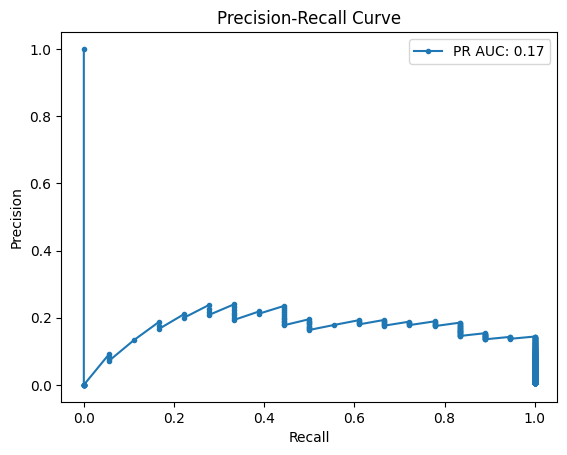

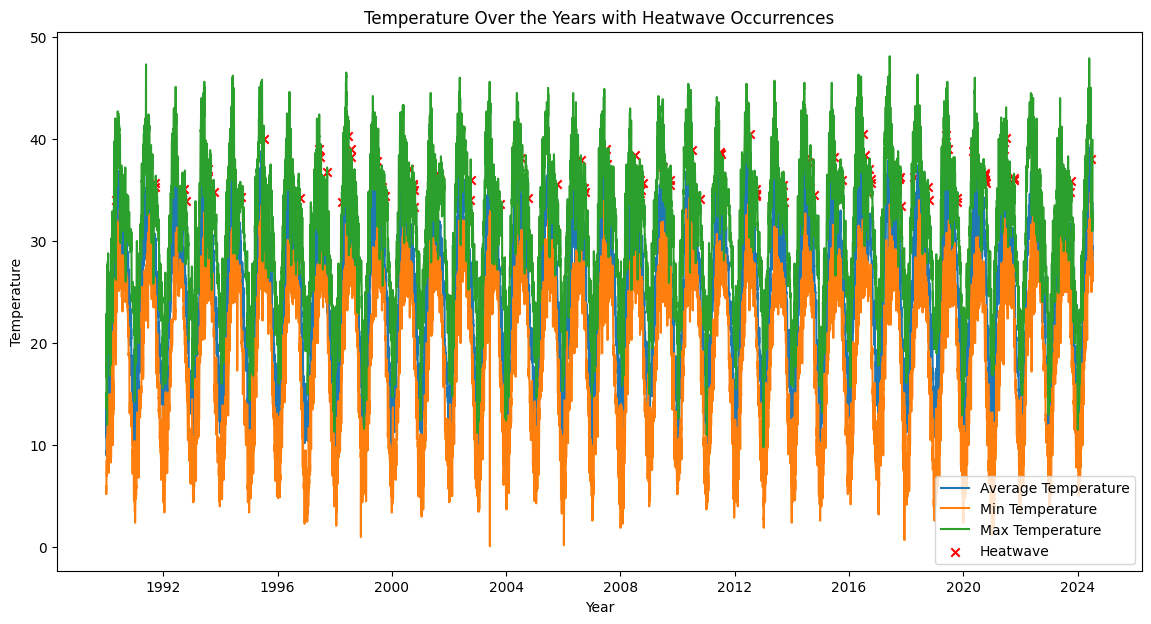

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Prediction for 2024-06-06: No Heatwave
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Prediction for 2025-06-06: No Heatwave
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Prediction for 2024-01-01: No Heatwave


In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_recall_curve, auc
from sklearn.utils import class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
from datetime import datetime
from imblearn.over_sampling import SMOTE

# Load and preprocess data
df = pd.read_csv('hu.csv')

# Convert 'time' column to datetime with the correct format
df['time'] = pd.to_datetime(df['time'], format='%d-%m-%Y')

# Sort data by time
df = df.sort_values(by='time')

# Define thresholds for heatwave classification
threshold_temp = 33  # Threshold for high temperature for a heatwave
threshold_humid = 60  # Threshold for high humidity for a heatwave

# Define function to classify heatwave based on temperature and humidity
def classify_heatwave(row):
    if row['tmax'] >= threshold_temp and row['humid'] == 60:
        return 1  # Heatwave due to high temperature and 100% humidity
    elif row['tmax'] > threshold_temp and row['humid'] > 100:
        return 1  # Heatwave due to high temperature and high humidity
    else:
        return 0  # Not a heatwave

# Apply classification function to create 'Heatwave' column
df['Heatwave'] = df.apply(classify_heatwave, axis=1)

# Handle missing values by filling with the mean of the respective columns
df.fillna(df.mean(), inplace=True)

# Prepare data for LSTM model
features = ['tavg', 'tmin', 'tmax', 'humid']  # Include 'humid' in features
X = df[features].values
y = df['Heatwave'].values

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Reshape input data for LSTM (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Apply SMOTE to training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train.reshape(X_train.shape[0], X_train.shape[2]), y_train)

# Reshape resampled data for LSTM
X_train_resampled = X_train_resampled.reshape((X_train_resampled.shape[0], 1, X_train_resampled.shape[1]))

# Adjust class weights to handle imbalanced classes
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train_resampled), y=y_train_resampled)
class_weights_dict = dict(enumerate(class_weights))

# Define and compile the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1, activation='sigmoid'))  # Use sigmoid for binary classification

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with class weights
model.fit(X_train_resampled, y_train_resampled, epochs=100, batch_size=32, validation_data=(X_test, y_test), class_weight=class_weights_dict)

# Evaluate the model
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluate accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')
print(classification_report(y_test, y_pred))

# Calculate precision and recall
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)

# Calculate the area under the precision-recall curve
pr_auc = auc(recall, precision)

# Plot the precision-recall curve
plt.figure()
plt.plot(recall, precision, marker='.', label=f'PR AUC: {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Function to predict heatwave for a given date based on historical data
def predict_heatwave(date_str):
    try:
        date = datetime.strptime(date_str, '%Y-%m-%d')
    except ValueError:
        return "Invalid date format. Please use YYYY-MM-DD."
    
    # Using the average of historical data as a placeholder for prediction
    avg_tavg = df['tavg'].mean()
    avg_tmin = df['tmin'].mean()
    avg_tmax = df['tmax'].mean()
    avg_humid = df['humid'].mean()
    
    sample = np.array([[avg_tavg, avg_tmin, avg_tmax, avg_humid]])
    sample_scaled = scaler.transform(sample)
    sample_scaled = sample_scaled.reshape((1, 1, sample_scaled.shape[1]))
    prediction_prob = model.predict(sample_scaled)
    prediction = (prediction_prob > 0.5).astype(int)
    return "Heatwave" if prediction == 1 else "No Heatwave"

# Plot temperature over the years with heatwave occurrences marked
plt.figure(figsize=(14, 7))
plt.plot(df['time'], df['tavg'], label='Average Temperature')
plt.plot(df['time'], df['tmin'], label='Min Temperature')
plt.plot(df['time'], df['tmax'], label='Max Temperature')

# Mark heatwave occurrences with a cross
heatwave_dates = df[df['Heatwave'] == 1]['time']
heatwave_temps = df[df['Heatwave'] == 1]['tmax']
plt.scatter(heatwave_dates, heatwave_temps, color='red', marker='x', label='Heatwave')

plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Temperature Over the Years with Heatwave Occurrences')
plt.legend()
plt.show()

# Interactive user input for heatwave prediction
while True:
    date_str = input("Enter a date (YYYY-MM-DD) to predict heatwave or 'exit' to quit: ")
    if date_str.lower() == 'exit':
        break
    prediction = predict_heatwave(date_str)
    print(f'Prediction for {date_str}: {prediction}')


In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import TimeSeriesSplit
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
from datetime import datetime

# Load and preprocess data
df = pd.read_csv('hu.csv')

# Convert 'time' column to datetime with the correct format
df['time'] = pd.to_datetime(df['time'], format='%d-%m-%Y')

# Sort data by time
df = df.sort_values(by='time')

# Define thresholds for heatwave classification
threshold_temp = 33  # Threshold for high temperature for a heatwave
threshold_humid = 60  # Threshold for high humidity for a heatwave

# Define function to classify heatwave based on temperature and humidity
def classify_heatwave(row):
    if row['tmax'] >= threshold_temp and row['humid'] >= threshold_humid:
        return 1  # Heatwave due to high temperature and high humidity
    else:
        return 0  # Not a heatwave

# Apply classification function to create 'Heatwave' column
df['Heatwave'] = df.apply(classify_heatwave, axis=1)

# Prepare data for LSTM model
features = ['tavg', 'tmin', 'tmax', 'humid']  # Include 'humid' in features
X = df[features].values
y = df['Heatwave'].values

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Reshape input data for LSTM (samples, time steps, features)
X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Define the LSTM model
def create_model():
    model = Sequential()
    model.add(LSTM(50, input_shape=(X_scaled.shape[1], X_scaled.shape[2])))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# TimeSeriesSplit cross-validation
tscv = TimeSeriesSplit(n_splits=5)
accuracies = []

for train_index, test_index in tscv.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model = create_model()
    model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=0)
    
    y_pred_prob = model.predict(X_test)
    y_pred = (y_pred_prob > 0.5).astype(int)
    
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f'Fold accuracy: {accuracy*100:.2f}%')

print(f'Mean accuracy: {np.mean(accuracies)*100:.2f}%')
print(f'Standard deviation: {np.std(accuracies)*100:.2f}%')

# Function to predict heatwave for a given date based on historical data
def predict_heatwave(date_str):
    try:
        date = datetime.strptime(date_str, '%Y-%m-%d')
    except ValueError:
        return "Invalid date format. Please use YYYY-MM-DD."
    
    # Using the average of historical data as a placeholder for prediction
    avg_tavg = df['tavg'].mean()
    avg_tmin = df['tmin'].mean()
    avg_tmax = df['tmax'].mean()
    avg_humid = df['humid'].mean()
    
    sample = np.array([[avg_tavg, avg_tmin, avg_tmax, avg_humid]])
    sample_scaled = scaler.transform(sample)
    sample_scaled = sample_scaled.reshape((1, 1, sample_scaled.shape[1]))
    prediction_prob = model.predict(sample_scaled)
    prediction = (prediction_prob > 0.5).astype(int)
    return "Heatwave" if prediction == 1 else "No Heatwave"

# Plot temperature over the years with heatwave occurrences marked
plt.figure(figsize=(14, 7))
plt.plot(df['time'], df['tavg'], label='Average Temperature')
plt.plot(df['time'], df['tmin'], label='Min Temperature')
plt.plot(df['time'], df['tmax'], label='Max Temperature')

# Mark heatwave occurrences with a cross
heatwave_dates = df[df['Heatwave'] == 1]['time']
heatwave_temps = df[df['Heatwave'] == 1]['tmax']
plt.scatter(heatwave_dates, heatwave_temps, color='red', marker='x', label='Heatwave')

plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Temperature Over the Years with Heatwave Occurrences')
plt.legend()
plt.show()

# Interactive user input for heatwave prediction
while True:
    date_str = input("Enter a date (YYYY-MM-DD) to predict heatwave or 'exit' to quit: ")
    if date_str.lower() == 'exit':
        break
    prediction = predict_heatwave(date_str)
    print(f'Prediction for {date_str}: {prediction}')


C:\Users\subbu\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


KeyboardInterrupt: 

66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Fold accuracy: 82.44%
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Fold accuracy: 81.68%
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Fold accuracy: 75.49%
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Fold accuracy: 75.35%
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Fold accuracy: 76.53%
Mean accuracy: 78.30%
Standard deviation: 3.11%


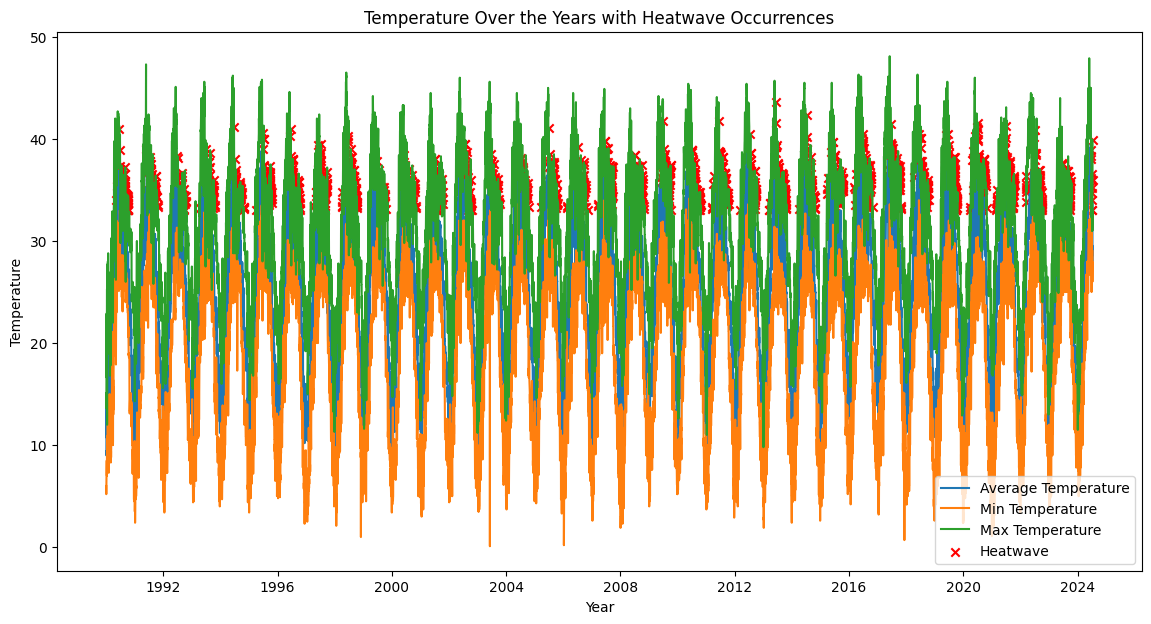

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Prediction for 2025-06-06: No Heatwave
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Prediction for 2021-07-07: No Heatwave


In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import TimeSeriesSplit
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
import matplotlib.pyplot as plt
from datetime import datetime

# Load and preprocess data
df = pd.read_csv('hu.csv')

# Convert 'time' column to datetime with the correct format
df['time'] = pd.to_datetime(df['time'], format='%d-%m-%Y')

# Sort data by time
df = df.sort_values(by='time')

# Define thresholds for heatwave classification
threshold_temp = 33  # Threshold for high temperature for a heatwave
threshold_humid = 60  # Threshold for high humidity for a heatwave

# Define function to classify heatwave based on temperature and humidity
def classify_heatwave(row):
    if row['tmax'] >= threshold_temp and row['humid'] >= threshold_humid:
        return 1  # Heatwave due to high temperature and high humidity
    else:
        return 0  # Not a heatwave

# Apply classification function to create 'Heatwave' column
df['Heatwave'] = df.apply(classify_heatwave, axis=1)

# Prepare data for LSTM model
features = ['tavg', 'tmin', 'tmax', 'humid']  # Include 'humid' in features
X = df[features].values
y = df['Heatwave'].values

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Reshape input data for LSTM (samples, time steps, features)
X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Define the LSTM model
def create_model(input_shape):
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(LSTM(50))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# TimeSeriesSplit cross-validation
tscv = TimeSeriesSplit(n_splits=5)
accuracies = []

for train_index, test_index in tscv.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model = create_model((X_train.shape[1], X_train.shape[2]))
    model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=0)
    
    y_pred_prob = model.predict(X_test)
    y_pred = (y_pred_prob > 0.5).astype(int)
    
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f'Fold accuracy: {accuracy*100:.2f}%')

print(f'Mean accuracy: {np.mean(accuracies)*100:.2f}%')
print(f'Standard deviation: {np.std(accuracies)*100:.2f}%')

# Function to predict heatwave for a given date based on historical data
def predict_heatwave(date_str):
    try:
        date = datetime.strptime(date_str, '%Y-%m-%d')
    except ValueError:
        return "Invalid date format. Please use YYYY-MM-DD."
    
    # Using the average of historical data as a placeholder for prediction
    avg_tavg = df['tavg'].mean()
    avg_tmin = df['tmin'].mean()
    avg_tmax = df['tmax'].mean()
    avg_humid = df['humid'].mean()
    
    sample = np.array([[avg_tavg, avg_tmin, avg_tmax, avg_humid]])
    sample_scaled = scaler.transform(sample)
    sample_scaled = sample_scaled.reshape((1, 1, sample_scaled.shape[1]))
    prediction_prob = model.predict(sample_scaled)
    prediction = (prediction_prob > 0.5).astype(int)
    return "Heatwave" if prediction == 1 else "No Heatwave"

# Plot temperature over the years with heatwave occurrences marked
plt.figure(figsize=(14, 7))
plt.plot(df['time'], df['tavg'], label='Average Temperature')
plt.plot(df['time'], df['tmin'], label='Min Temperature')
plt.plot(df['time'], df['tmax'], label='Max Temperature')

# Mark heatwave occurrences with a cross
heatwave_dates = df[df['Heatwave'] == 1]['time']
heatwave_temps = df[df['Heatwave'] == 1]['tmax']
plt.scatter(heatwave_dates, heatwave_temps, color='red', marker='x', label='Heatwave')

plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Temperature Over the Years with Heatwave Occurrences')
plt.legend()
plt.show()

# Interactive user input for heatwave prediction
while True:
    date_str = input("Enter a date (YYYY-MM-DD) to predict heatwave or 'exit' to quit: ")
    if date_str.lower() == 'exit':
        break
    prediction = predict_heatwave(date_str)
    print(f'Prediction for {date_str}: {prediction}')
